# ANN Regression

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


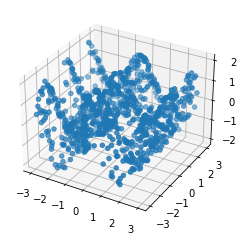

In [3]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3
y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)
plt.show()

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 416us/sample - loss: 1.0404
Epoch 2/100
1000/1000 [==============================] - 0s 42us/sample - loss: 1.0022
Epoch 3/100
1000/1000 [==============================] - 0s 42us/sample - loss: 0.9939
Epoch 4/100
1000/1000 [==============================] - 0s 42us/sample - loss: 0.9659
Epoch 5/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.8557
Epoch 6/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.7621
Epoch 7/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.7362
Epoch 8/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.6349
Epoch 9/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.6226
Epoch 10/100
1000/1000 [==============================] - 0s 42us/sample - loss: 0.5640
Epoch 11/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.5590
Epoch 12/100
1000/

Epoch 94/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0100
Epoch 95/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0101
Epoch 96/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.0137
Epoch 97/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0071
Epoch 98/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.0075
Epoch 99/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.0080
Epoch 100/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0128


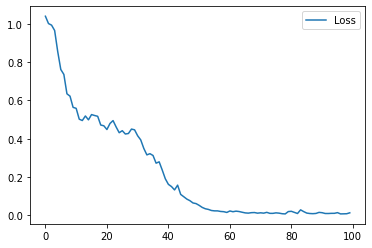

In [4]:
i = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(128, activation='relu')(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse')

r = model.fit(X, y,
              epochs=100)

plt.plot(r.history.get('loss'), label='Loss')
plt.legend()
plt.show()

## Plot the prediction surface

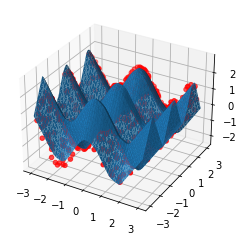

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='red')

ticks = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(ticks, ticks)
X_hat = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(X_hat).flatten()
ax.plot_trisurf(xx.flatten(), yy.flatten(), y_hat, linewidth=0.2, antialiased=True)
plt.show()

## See if the neural network can extrapolate

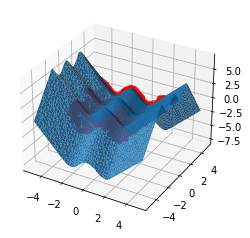

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='red')

ticks = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(ticks, ticks)
X_hat = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(X_hat).flatten()
ax.plot_trisurf(xx.flatten(), yy.flatten(), y_hat, linewidth=0.2, antialiased=True)
plt.show()